In [49]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

## Exploring data

First, I loaded the raw data to gain some information about this dataset.

In [50]:
df = pd.read_csv('raw/dataset_3.csv')
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [52]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [53]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

## Cleaning up the data

Similar to dataset 2, I will remove the category features for the sake of simplicity.

In [54]:
X = df.drop(['Timestamp', 'Ad Topic Line', 'Country', 'City', 'Clicked on Ad'], axis=1)
X.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
5,59.99,23,59761.56,226.74,1
6,88.91,33,53852.85,208.36,0
7,66.00,48,24593.33,131.76,1
8,74.53,30,68862.00,221.51,1
9,69.88,20,55642.32,183.82,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [56]:
y = df['Clicked on Ad']

# Data visualization

First, I draw a pie chart that show the distribution of each class in the dataset.

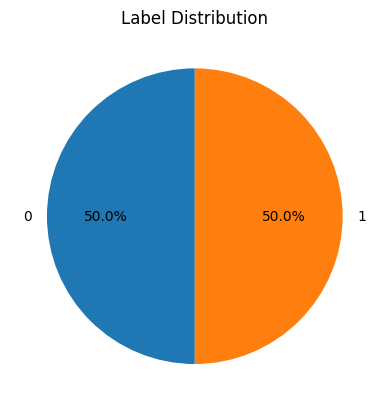

In [57]:
diagnosis_counts = df['Clicked on Ad'].value_counts()
plt.pie(diagnosis_counts,labels=diagnosis_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Label Distribution')
plt.show()

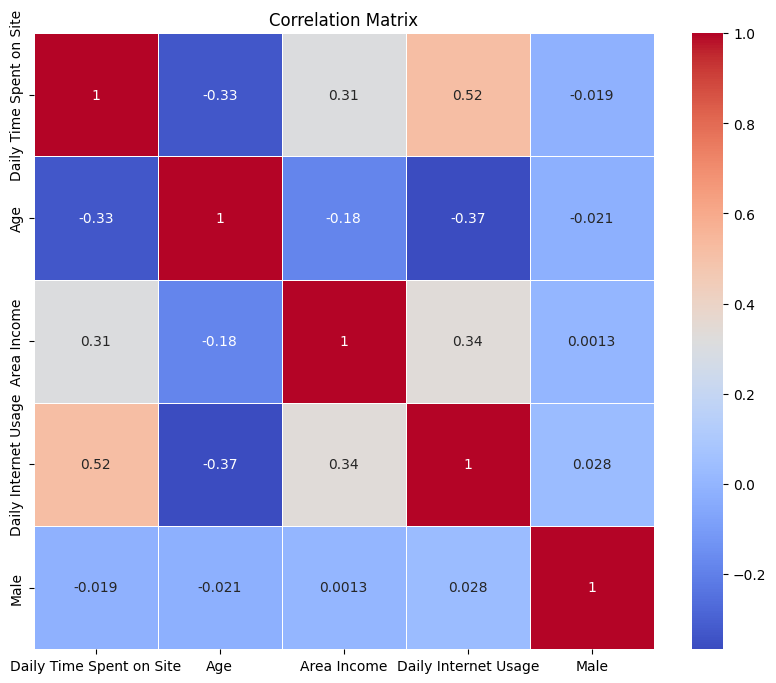

In [67]:
# Create a DataFrame from the numpy array X for better visualization
X_df = pd.DataFrame(X, columns=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male'])

# Calculate the correlation matrix
corr_matrix = X_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the data visualization part, it can be seen this dataset is very balance.

# Standardization

In this step, I aimed to normalize the dataset.

In [58]:
scalar = preprocessing.StandardScaler()

In [59]:
X = scalar.fit_transform(X)
X

array([[ 0.24926659, -0.11490498,  0.50969109,  1.73403   , -0.96269532],
       [ 0.96113227, -0.57042523,  1.00253021,  0.31380538,  1.03875025],
       [ 0.28208309, -1.13982553,  0.35694859,  1.28758905, -0.96269532],
       ...,
       [-0.84377541,  1.707176  , -0.93857029, -1.35892388,  1.03875025],
       [-0.59638946, -1.93698596, -0.97548353,  0.18117208, -0.96269532],
       [-1.26155474, -1.13982553, -1.87383208, -0.0376045 , -0.96269532]])

# Encoding

After that, I encoded the labels to turn them into numerical feature, so that the algorithm can work fine. Then, I concatenated the label column and the feature columns to get a fully processed dataset.

In [65]:
label_encoding = preprocessing.LabelEncoder()
y = label_encoding.fit_transform(y)

df_X = pd.DataFrame(X, columns=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male'])
df_y = pd.DataFrame(y, columns=['class'])
df = pd.concat([df_X, df_y], axis=1)
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,class
0,0.249267,-0.114905,0.509691,1.734030,-0.962695,0
1,0.961132,-0.570425,1.002530,0.313805,1.038750,0
2,0.282083,-1.139826,0.356949,1.287589,-0.962695,0
3,0.577432,-0.798185,-0.014456,1.501580,1.038750,0
4,0.212664,-0.114905,1.408868,1.038731,-0.962695,0
5,-0.316187,-1.481466,0.355130,1.065166,1.038750,0
6,1.508915,-0.342665,-0.085558,0.646300,-0.962695,0
7,0.063096,1.365536,-2.267813,-1.099355,1.038750,1
8,0.601413,-0.684305,1.033866,0.945979,1.038750,0
9,0.307958,-1.823106,0.047906,0.087053,1.038750,0


# Export data

In the final step, I exported the dataset and save it in a folder. It would be used for testing the algorithms.

In [66]:
df.to_csv('processed/dataset_3.csv', index=False)